In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('/content/USA_Housing.csv')

In [ ]:
df.shape

(5000, 7)

In [ ]:
df.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


In [ ]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Address'] = le.fit_transform(df['Address'])
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,4750
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,4636
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1897
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,4833


In [ ]:
for ifc in df.select_dtypes(include='float64').columns:
    if(df[ifc].skew() > 0.5):
        print(ifc, 'skewed')
        df[ifc] = df[ifc].fillna(df[ifc].median())
    else:
        print(ifc, 'Normal')
        df[ifc] = df[ifc].fillna(df[ifc].mean())

Avg. Area Income Normal
Avg. Area House Age Normal
Avg. Area Number of Rooms Normal
Avg. Area Number of Bedrooms Normal
Area Population Normal
Price Normal


Avg. Area Income


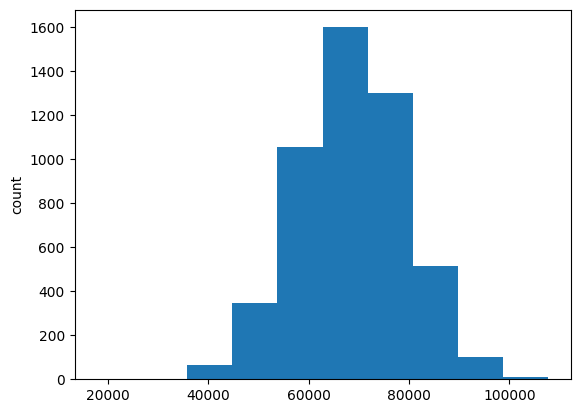

Avg. Area House Age


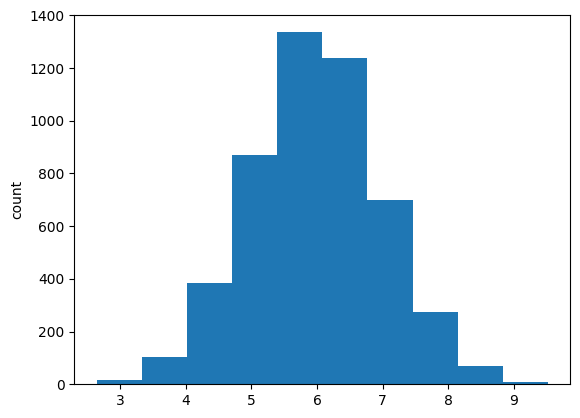

Avg. Area Number of Rooms


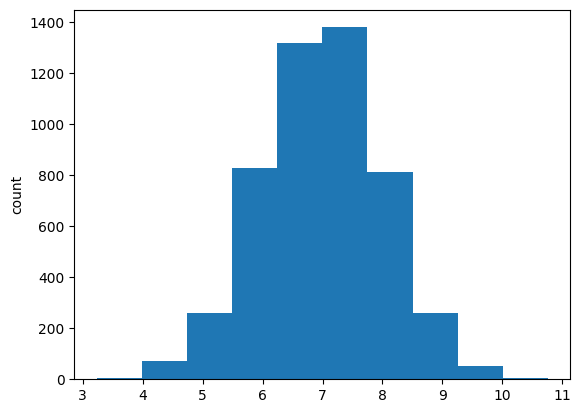

Avg. Area Number of Bedrooms


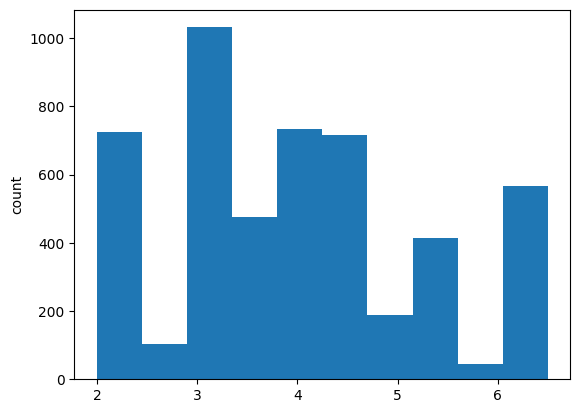

Area Population


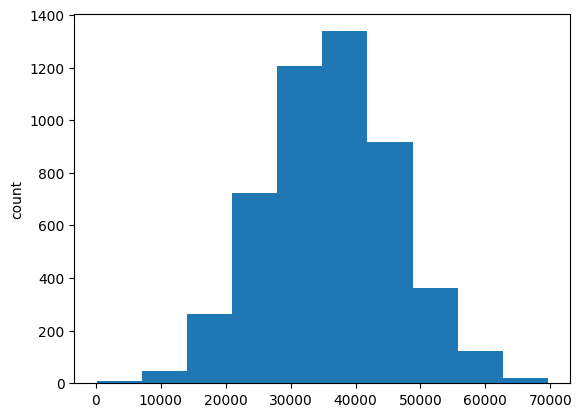

Price


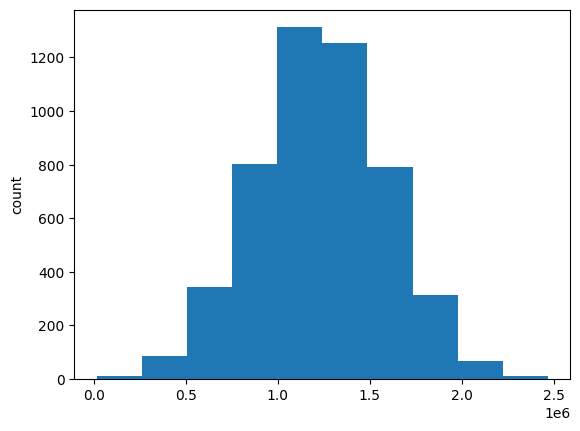

In [ ]:
for i in df.select_dtypes(include='float64').columns:
    plt.hist(df[i])
    print(i)
    plt.ylabel("count")
    plt.show()

**No skewed data has been found and no null value is there**

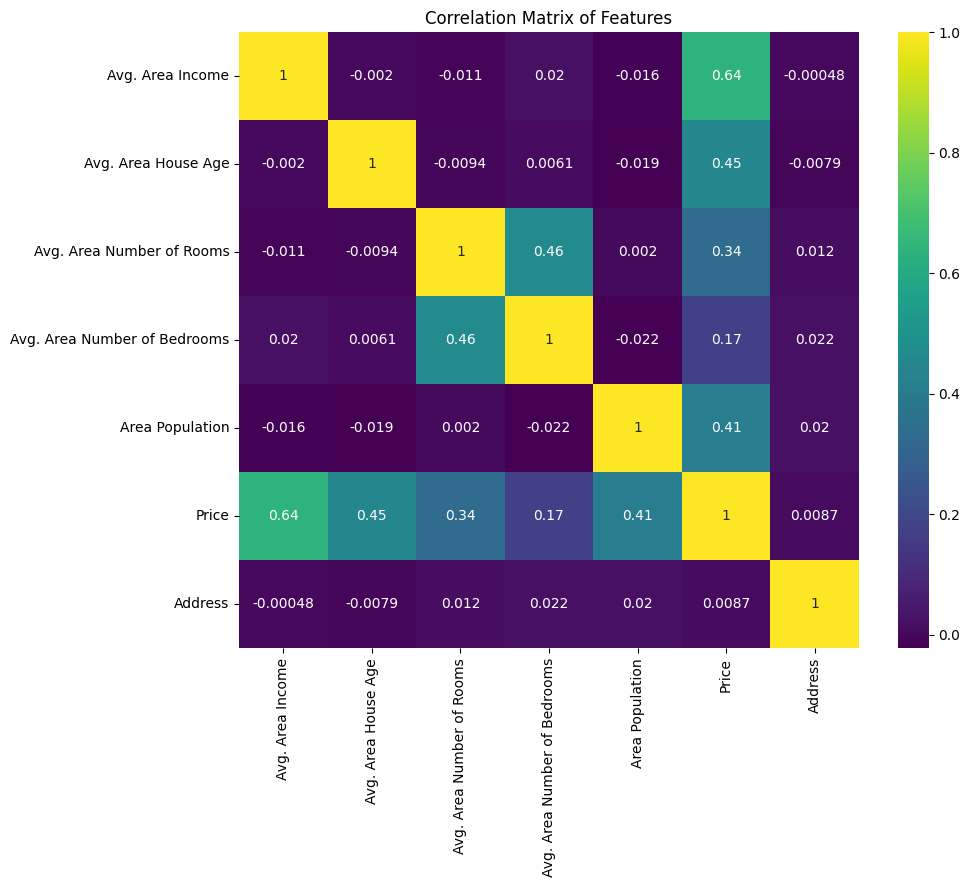

In [ ]:

df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06,2499.500000
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05,1443.520003
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04,0.000000
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05,1249.750000
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06,2499.500000
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06,3749.250000
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06,4999.000000


In [ ]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,4750
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,4636
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,1897
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,4833


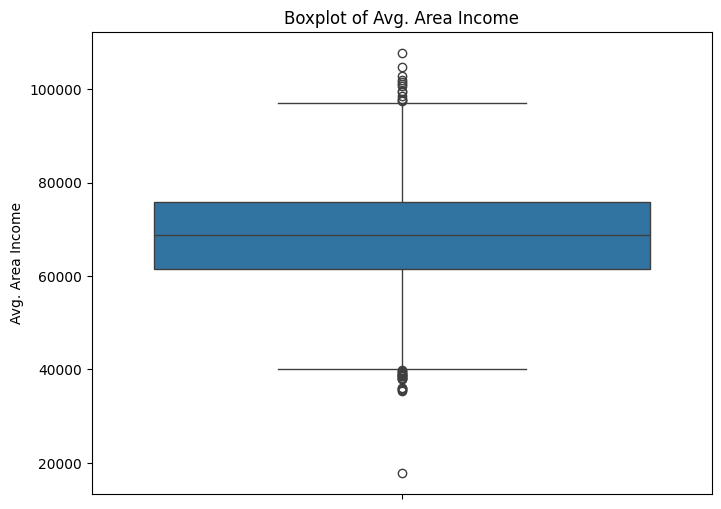

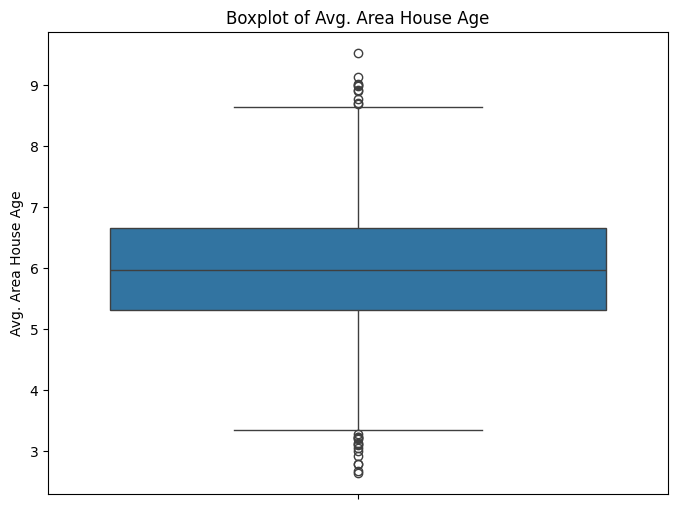

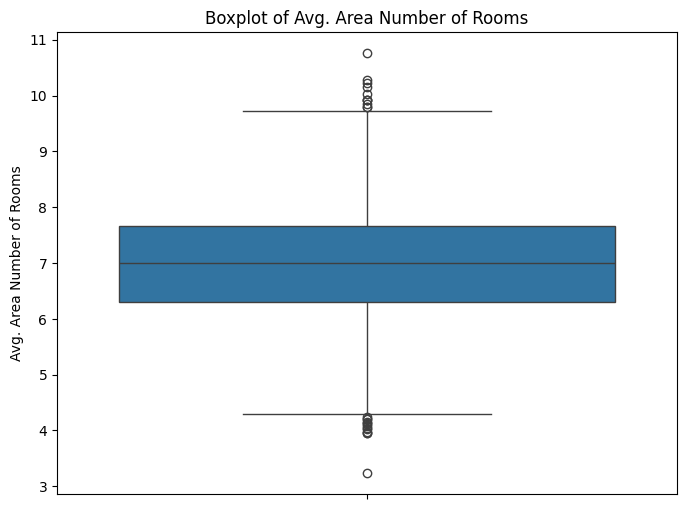

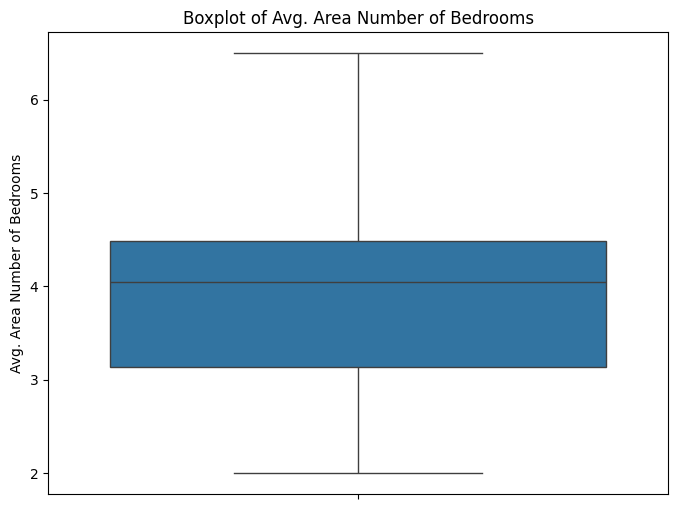

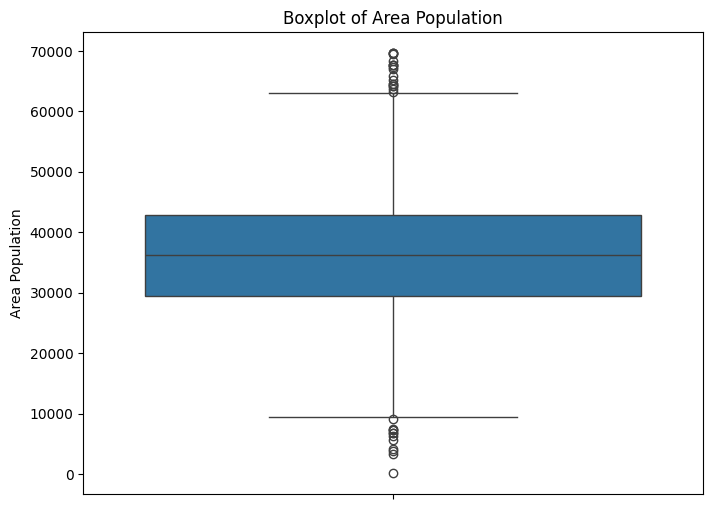

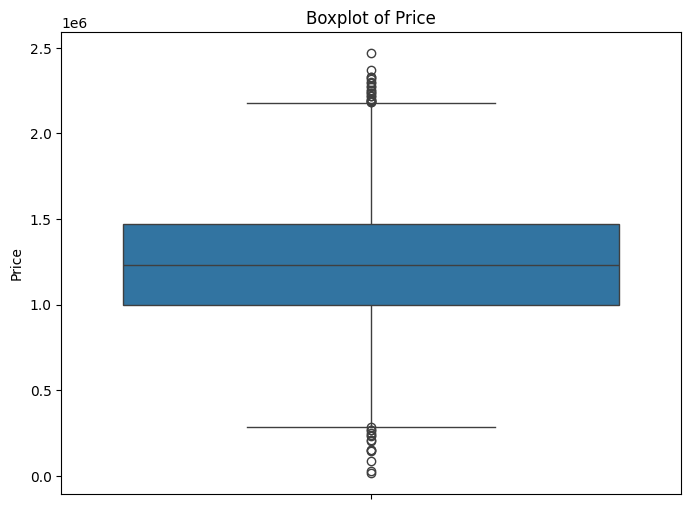

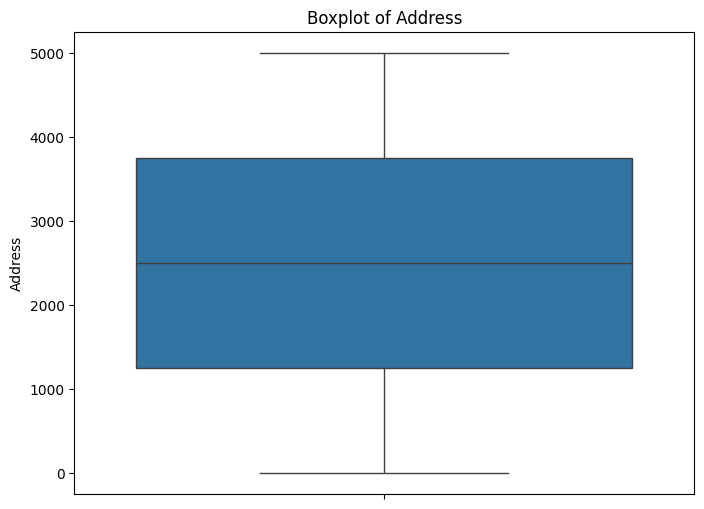

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], orient='v')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


In [ ]:
outlier_list = ['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']
for i in outlier_list:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    df = df[(df[i] > Q1 - 1.5 * IQR) & (df[i] < Q3 + 1.5 * IQR)]

In [ ]:
df.shape

(4856, 7)

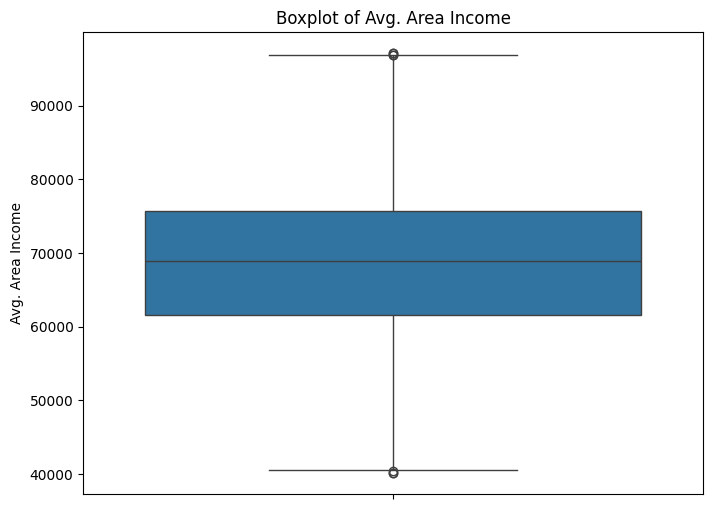

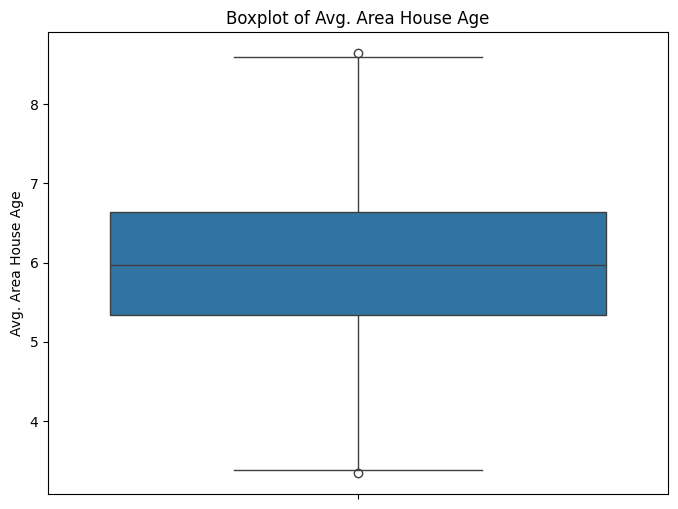

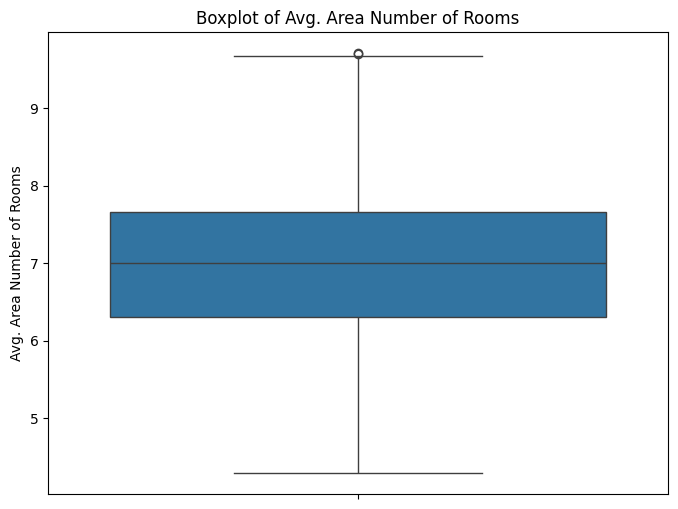

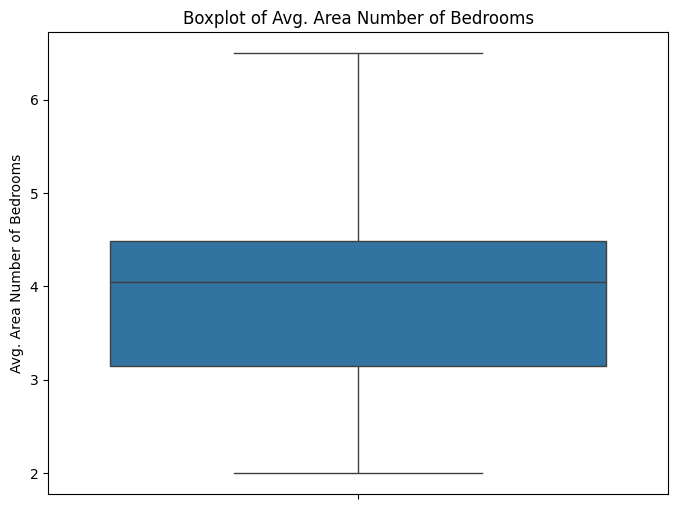

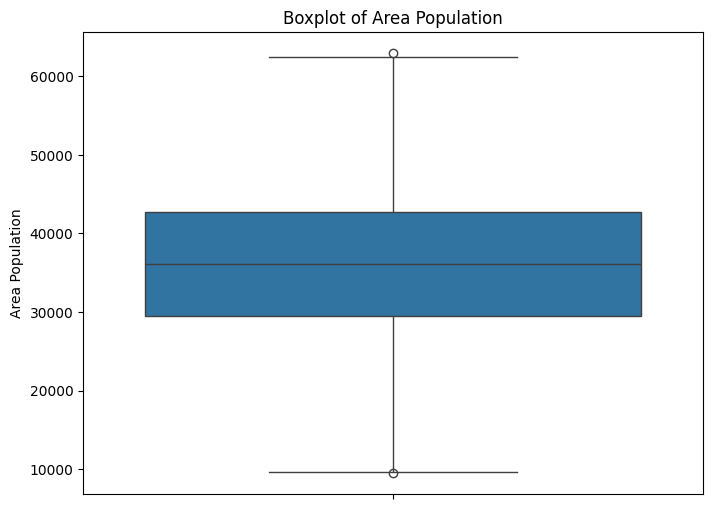

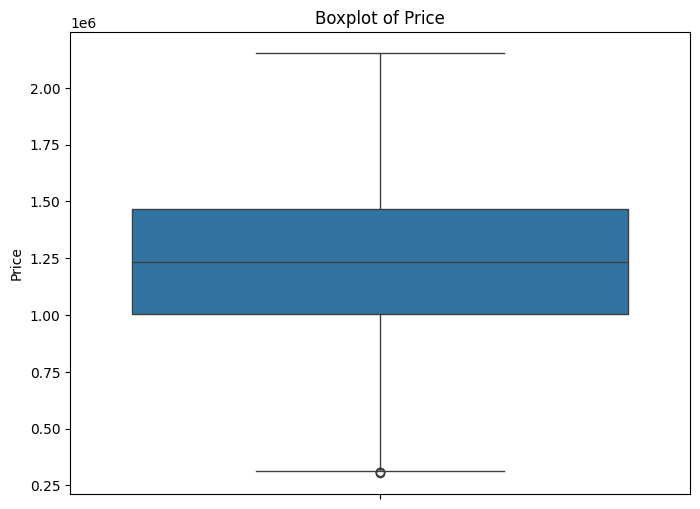

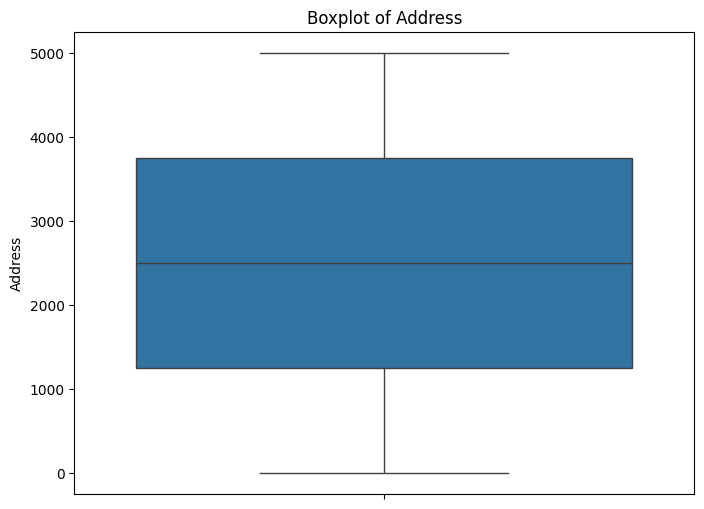

In [ ]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], orient='v')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Price', axis=1)
y = df['Price']

# One-hot encode categorical features
x = pd.get_dummies(x, drop_first=True)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [ ]:
lrmodel.predict(x_train)

array([1101713.9774759 ,  589733.07558048,  773094.86861728, ...,
       1162099.27809198, 1184622.44348516,  559159.44016335])

In [ ]:
lrmodel.predict(x_test)

array([ 732670.17553722,  937696.94198819, 1210926.70114258,
       1827599.29854218, 1325078.10836972, 1761501.13755785,
        774431.6797793 , 1135299.83298163, 1212272.85188671,
       1738339.53524036,  928704.99467474, 1322353.52555583,
        920151.969908  , 1710495.70506916, 1324709.31846262,
       1279627.73038933, 1642542.88285199,  855682.84227711,
       1306357.8266151 ,  931600.04447068, 1333965.03250035,
       1117473.96781266, 1192127.08372797, 1086257.88154699,
        763904.57264324, 1392899.15124638, 1296118.49167769,
       1119766.41372591, 1595382.54630583,  917313.14794429,
       1860221.65296517, 1636865.79930343,  685644.83153695,
       1191182.81356588, 1020469.64799724, 1002266.45779166,
       2146286.824458  ,  877042.45858702, 1250149.7367553 ,
       1270895.29365597, 1820856.55239016, 1543955.15134068,
       2026909.55938798, 1346766.36612701, 1447289.542849  ,
       1671600.04535057,  995685.68542521, 1202999.9102618 ,
       1260467.31884266,

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
y_train_pred = lrmodel.predict(x_train)

r2train = r2_score(y_train, y_train_pred)
print(f"R2 train: {r2train}")
y_pred = lrmodel.predict(x_test)
r2test = r2_score(y_test, y_pred)
print(f"R2 test: {r2test}")

R2 train: 0.9120526571602167
R2 test: 0.9049330754063671


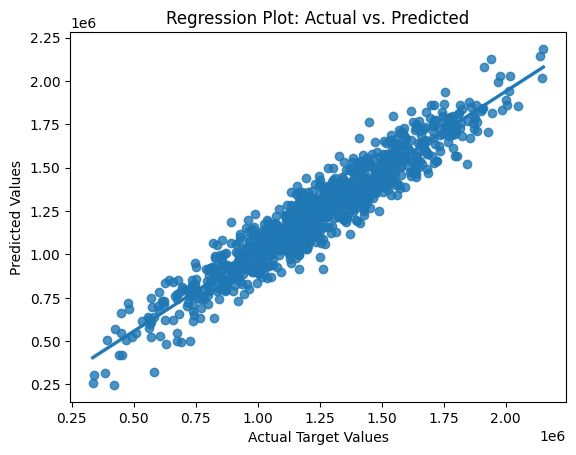

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
# Replace 'predictions' with 'y_pred', which holds the model's predictions
sns.regplot(x=y_test, y=y_pred)

# Set plot labels and title
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted")

# Display the plot
plt.show()